In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Path = 'content/drive/My Drive/Colab Notebooks/nwdaf_train.csv'

In [3]:
import pandas as pd
train_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nwdaf_train.csv', sep=',')

In [4]:
train_set.tail()

,t,cell_id,cat_id,pe_id,load,has_anomaly,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
1295995,17279,4,2,0,2.984396,0,2.992857,23.975682,19.892987,400.241689,5.645876,95.764741,3.991280,-67.699659,-85.925735
1295996,17279,4,2,1,19.591826,0,3.986447,20.165262,13.614927,-40.174436,50.211980,-75.196884,-2.004100,-3.001318,-74.692256
1295997,17279,4,2,2,90.086700,0,11.288111,7.140484,15.938352,556.475310,828.672477,-579.757968,16.607429,11.618932,10.621715
1295998,17279,4,2,3,1.006407,0,54.839263,29.412855,26.573780,359.817789,-424.477943,406.507694,70.494874,67.510478,62.521981
1295999,17279,4,2,4,6.020185,0,45.546553,28.417332,26.196507,-98.882846,126.364213,-154.156057,-89.080292,-108.672118,-111.656514


In [5]:
import pickle
train_set.to_pickle(path = '/content/sample_data/nwdaf.pkl')

In [6]:
import pandas as pd
train_set = pd.read_pickle('/content/sample_data/nwdaf.pkl')

In [7]:
import matplotlib.pyplot as plt
import seaborn
train_set1 = train_set[['last2_mean','last4_mean','last8_mean','per_change_last2','per_change_last3','per_change_last4','change_last2','change_last3','change_last4']]
train_set1.head()

,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
0,0.000000,0.000000,0.000000,120.273863,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.997074,4.997074,4.997074,220.273863,120.273863,0.000000,4.997074,4.997074,4.997074
2,10.500698,10.500698,10.500698,220.273863,202.738627,220.273863,11.007248,11.007248,6.010174
3,34.494854,24.662261,24.662261,231.069230,-335.970115,290.572082,36.981064,31.983990,31.983990
4,26.992577,18.746637,18.746637,-98.113127,140.573616,-183.850690,-51.985619,-67.989941,-72.987015


In [8]:
train_set1.corr()

,last2_mean,last4_mean,last8_mean,per_change_last2,per_change_last3,per_change_last4,change_last2,change_last3,change_last4
last2_mean,1.000000e+00,0.420936,0.648442,-0.202197,-0.397743,0.371929,-7.555296e-09,0.184724,0.405477
last4_mean,4.209356e-01,1.000000,0.631950,-0.203184,-0.823903,0.782707,-1.117212e-01,-0.276915,-0.344950
last8_mean,6.484416e-01,0.631950,1.000000,0.087509,-0.501123,0.539646,-8.763264e-02,-0.259632,0.009903
per_change_last2,-2.021973e-01,-0.203184,0.087509,1.000000,0.175465,-0.009590,6.580529e-01,0.295973,0.455131
per_change_last3,-3.977426e-01,-0.823903,-0.501123,0.175465,1.000000,-0.965316,-1.392683e-01,-0.028226,0.085357
per_change_last4,3.719287e-01,0.782707,0.539646,-0.009590,-0.965316,1.000000,3.077570e-01,0.126063,0.041753
change_last2,-7.555296e-09,-0.111721,-0.087633,0.658053,-0.139268,0.307757,1.000000e+00,0.854655,0.780425
change_last3,1.847245e-01,-0.276915,-0.259632,0.295973,-0.028226,0.126063,8.546551e-01,1.000000,0.878935
change_last4,4.054765e-01,-0.344950,0.009903,0.455131,0.085357,0.041753,7.804252e-01,0.878935,1.000000


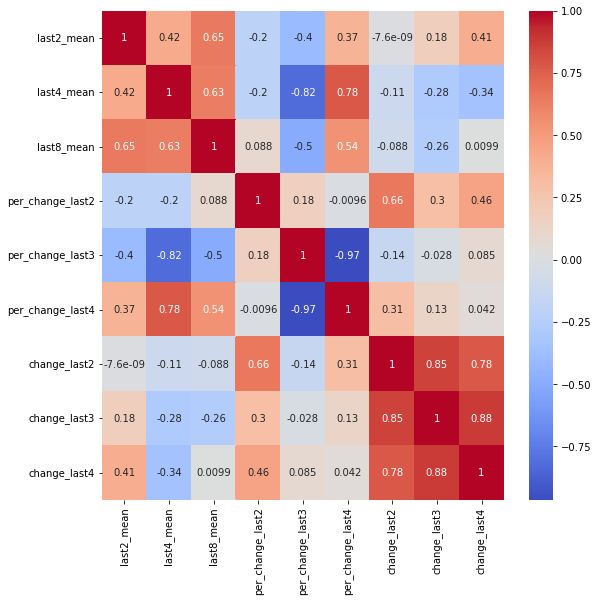

In [9]:
plt.figure(figsize=(9,9))
seaborn.heatmap(train_set1.corr(), annot=True,cmap="coolwarm")

In [10]:
X = train_set1.iloc[:, :]
y = train_set1.iloc[:, :]

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

X_train = X_ss[:907200, :]
X_test = X_ss[907200:, :]

y_train = y_mm[:907200, :]
y_test = y_mm[907200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (907200, 9) (907200, 9)
Testing Shape (388800, 9) (388800, 9)


In [12]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [13]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 


X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([907200, 1, 9]) torch.Size([907200, 9])
Testing Shape torch.Size([388800, 1, 9]) torch.Size([388800, 9])


In [14]:
import torch
import torchvision
import torch.nn as tn
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import torch.utils as utils

In [15]:
train_dataLoader = torch.utils.data.DataLoader(X_train, batch_size=1000,shuffle=True)
test_dataLoader = torch.utils.data.DataLoader(X_test,batch_size=1000,shuffle=False)

In [16]:
import sklearn.preprocessing
scaler=sklearn.preprocessing.StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [17]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [18]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = 9 #number of features
hidden_size = 4 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [19]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class

In [20]:
criterion = nn.L1Loss()   # mean-absolute error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [21]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:96: UserWarning: Using a target size (torch.Size([907200, 9])) that is different to the input size (torch.Size([907200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0, loss: 0.64152
Epoch: 100, loss: 0.22645
Epoch: 200, loss: 0.22465
Epoch: 300, loss: 0.21908
Epoch: 400, loss: 0.21534
Epoch: 500, loss: 0.21496
Epoch: 600, loss: 0.21485
Epoch: 700, loss: 0.21481
Epoch: 800, loss: 0.21479
Epoch: 900, loss: 0.21478


In [22]:
df_X_ss = ss.transform(train_set1.iloc[:, :]) #old transformers
df_y_mm = mm.transform(train_set1.iloc[:, :]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

In [ ]:
type(train_set1)

pandas.core.frame.DataFrame

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


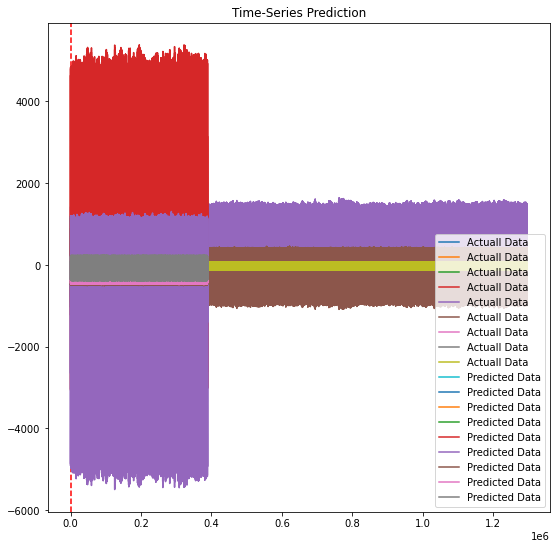

In [23]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = X_test_tensors.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(9,9)) #plotting
plt.axvline(x=200, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 